# IT350 Data Analytics Assignment 2

## Harsh Agarwal (181IT117)

## Hypothesis Testing of Wine Quality Dataset
### 8th Feb 2021

### About the dataset

The dataset is taken from the UCIML Respository (https://archive.ics.uci.edu/ml/datasets/wine+quality). The goal of the dataset is to model wine quality based on physicochemical tests. The wines are rated in a range of 0-10 based on their quality.

The dataset contains total 11 attributes out of which 10 are input variables and 1 is the output variable.

Input variables (based on physicochemical tests):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  

Output variable (based on sensory data):  
12 - quality (score between 0 and 10)  

Following is the citation of dataset:  
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.  
  Modeling wine preferences by data mining from physicochemical properties.  
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.  

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016  
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf  
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib  


In [18]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.stats import weightstats as stests

In [72]:
# Importing the Dataset
# Source: https://archive.ics.uci.edu/ml/datasets/wine+quality
data = pd.read_csv("winequality-white.csv", delimiter=";")

In [73]:
data.head(len(data))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


##### Observations:  

We observe that the dataset has a total of 4897 instances and a total of 12 attributes. The dataset is complete and has no missing values. The last column <b>quality</b> is the class label of a row nad rest all columns are independent of each other.

All the input variable attributes are <b>floating point numbers</b> and the class label is an <b>integer</b>. 

In [74]:
# Categorizing data into numerical data and the result data
num_data = data.columns[:-1]
class_label = ["quality"]

### Frequency Distribution of of class labels

Attribute: quality
6 : 2198
5 : 1457
7 : 880
8 : 175
4 : 163
3 : 20
9 : 5



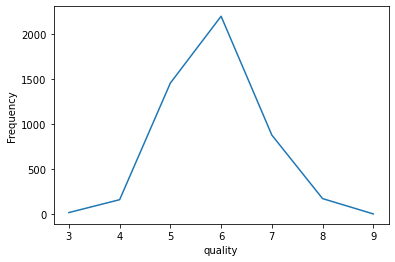

In [75]:
# Frequency Distribution of Quality

attribute = "quality"
freq_dist = dict.fromkeys(data[attribute].unique(), 0)
for a in range(len(data[attribute])):
    freq_dist[data[attribute][a]] += 1
    
print("Attribute:", attribute)
for val in data[attribute].unique():
    print(val, ":", freq_dist[val])
print()

x = sorted(data[attribute].unique())
y = [freq_dist[val] for val in x]
plt.plot(x, y)
plt.ylabel("Frequency")
plt.xlabel(attribute)
plt.show()

##### Observations:  

As we can visulaize from the graphs, the data is distributed only among the classes <b>3 to 9</b>. Out of which majority of the data is distributed among the middle quality classes of <b>5 to 7</b>. Therefore the data is <b>not uniformly distributed</b>.

### Frequency Distribution of Attributes

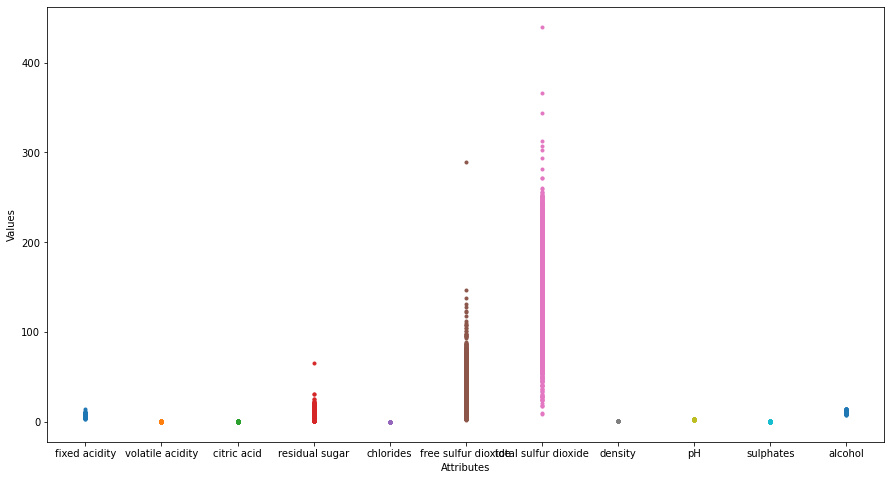

In [77]:
# Graphical frequency distribution of Numerical Attributes 
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(8)
for a in range(len(num_data)):
    plt.plot(len(data[num_data[a]]) * [a], data[num_data[a]], ".")
    
plt.ylabel("Values")
plt.xlabel("Attributes")
plt.xticks([a for a in range(len(num_data))], num_data)
plt.show()

##### Observations:  

The values of Total and free Sulphur Dioxide are spread over a large range wheareas all other values are spread over in relatively smaller ranges.

## Z - Tests

### Right Tailed Z - Test

Claim : Alcohol content of wine with quality = 8 is above average  
Null Hypothesis:H0 = mean of the sample is equal to mean of population  
Alternative Hypothesis:H1 = Mean of sample is greater than mean of population

In [70]:
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(x1 = data[data['quality'] == 8]['alcohol'],
                             value = data['alcohol'].mean())

# print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{}'.format(p_value))

if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Z-statistic is :11.59181968457038
P-value is :4.533963908245483e-31
Reject the null hypothesis


### Left Tailed Z - Test

Claim : The pH level of wine woth quality = 5 is below average  
Null Hypothesis:H0 = mean of the sample is equal to mean of population  
Alternative Hypothesis:H1 = Mean of sample is less than mean of population

In [29]:
z_statistic, p_value = ztest(x1 = data[data['quality'] == 5]['pH'],
                             value = data['pH'].mean())

# print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Z-statistic is :-5.264802887143946
P-value is :0.00000014033984829670905296713145568587854938868986
Reject the null hypothesis


### Two-tailed Z - Test

Claim : Total suphur dioxide value of wine with quality 8 differes from the overall average    
Null Hypothesis:H0 = mean of the sample is equal to mean of population    
Alternative Hypothesis:H1 = Mean of sample is not eqaul to the mean of population  

NOTE: Here the significance value is taken as 0.01 because of the fact that the values of total sulphur dioxide are spread out in a large interval. Also this is a two tailed interval so a more strict interval is used.

In [31]:
z_statistic, p_value = ztest(x1 = data[data['quality'] == 8]['total sulfur dioxide'],
                             value = data['total sulfur dioxide'].mean())

# print the Results
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{:.50f}'.format(p_value))

if p_value<0.01:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Z-statistic is :-4.887666594224021
P-value is :0.00000102038141004196848579373482768239966844703304
Reject the null hypothesis


## T - Tests

### One - Sample T - Test

Claim : The mean of the residual sugar value for wine with quality 4 is different from mean of all residual sugar values.     
Null Hypothesis:H0 = The mean of the residual sugar value for wine with quality 4 is same as mean of all residual sugar values.  
Alternative Hypothesis:H1 = H0 = The mean of the residual sugar value for wine with quality 4 is different from mean of all residual sugar values.

NOTE: The sample size is taken only as the wines with quality 4 because T - test is performed on a small sample size

In [68]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(a= data[data['quality'] == 4]['residual sugar'],
                 popmean= data['residual sugar'].mean()) 

print('T-statistic is :{}'.format(t_statistic))
print('P-value is :{:.50f}'.format(p_value))

if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

T-statistic is :-5.40659509978101
P-value is :0.00000022656660879241258410243483635559957889427096
Reject the null hypothesis


## F- Tests

### ANOVA Test

Claim : There is not a significant difference in the mean alcohol levels of the wines with quality 6,7,8   
Null Hypothesis:H0 = means of alcohol content of wine qualitiess 6,7,8 are all equal  
Alternative Hypothesis:H1 = Means are not all equal.  

In [69]:
df_anova = data[['alcohol','quality']]
grps = pd.unique(df_anova.quality.values)
d_data = {grp:df_anova['alcohol'][df_anova.quality == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data[6], d_data[7], d_data[8])
print('F-statistic is :{}'.format(F))
print('P-value is :{}'.format(p))

if p<0.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

F-statistic is :182.3042728669789
P-value is :9.138947286417128e-76
Reject the null hypothesis


### Chi - Square Test

Chi Square Test is used to find the relationship between two or more Categorical Variables and determine whether they are independent from each other or not.  
 

NOTE: In this dataset, only 1 categorical variable is present, i.e. Quality variable. Therefore, performing a Chi- Square Test is not feasible for this dataset. Therfore we will perform the test on other set of data.

Null Hypothesis: All the categorical variables are independent.  
Alternate Hypothesis: The categorical variables are dependent on each other. 

In [12]:
# Importing the City Temperature Dataset
import statsmodels.api as sm

df = sm.datasets.webuse("citytemp2")

In [20]:
df.head(len(df))

,division,region,heatdd,cooldd,tempjan,tempjuly,agecat
0,N. Eng.,NE,NaN,NaN,16.600000,69.599998,19-29
1,N. Eng.,NE,7947.0,250.0,18.200001,68.000000,19-29
2,Mid Atl,NE,7480.0,424.0,18.400000,70.199997,19-29
3,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29
4,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29
...,...,...,...,...,...,...,...
951,Pacific,West,0.0,3134.0,71.400002,75.400002,35+
952,Pacific,West,0.0,4389.0,72.599998,80.099998,35+
953,Pacific,West,0.0,4389.0,72.599998,80.099998,35+
954,Pacific,West,0.0,4389.0,72.599998,80.099998,35+


In [15]:
# High level info about the dataset
df.info

<bound method DataFrame.info of     division region  heatdd  cooldd    tempjan   tempjuly agecat
0    N. Eng.     NE     NaN     NaN  16.600000  69.599998  19-29
1    N. Eng.     NE  7947.0   250.0  18.200001  68.000000  19-29
2    Mid Atl     NE  7480.0   424.0  18.400000  70.199997  19-29
3    N. Eng.     NE  7482.0   353.0  19.900000  69.500000  19-29
4    N. Eng.     NE  7482.0   353.0  19.900000  69.500000  19-29
..       ...    ...     ...     ...        ...        ...    ...
951  Pacific   West     0.0  3134.0  71.400002  75.400002    35+
952  Pacific   West     0.0  4389.0  72.599998  80.099998    35+
953  Pacific   West     0.0  4389.0  72.599998  80.099998    35+
954  Pacific   West     0.0  4389.0  72.599998  80.099998    35+
955  Pacific   West     0.0  4389.0  72.599998  80.099998    35+

[956 rows x 7 columns]>

In [19]:
crosstab = pd.crosstab(df["region"], df["agecat"])
crosstab

agecat,19-29,30-34,35+
region,,,
NE,46,83,37
N Cntrl,162,92,30
South,139,68,43
West,160,73,23


Here Chi - Square Test is performed to check the dependence between the age groups and regions. Significance level is chosen as 0.1 as the number of values are limited.  

Null Hypothesis: H0 = The age category and the geographical region are independent.  
Alternate Hypothesis: H1 =  The age category and the geographical region are not independent.

In [26]:
f_statistic, p_value, degree_of_freedom, expected_values = stats.chi2_contingency(crosstab)
print('Chi-square test statistic is :{}'.format(f_statistic))
print('P-value is :{}'.format(p_value))
print('Degree of freedom is :{}'.format(degree_of_freedom))
if p_value<0.01:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Chi-square test statistic is :61.28767688406036
P-value is :2.463382670201326e-11
Degree of freedom is :6
Reject the null hypothesis
